In [1]:
from argon.envs.pusht import PushTEnv
from argon.datasets.envs.pusht import register as register_pusht
import matplotlib.pyplot as plt
import argon.random
import argon.numpy as npx
import jax

In [2]:
env = PushTEnv()

In [3]:
x = env.reset(argon.random.key(42))
traj = [x]
for i in range(100):
    action = env.sample_action(argon.random.key(i))
    x = env.step(x, action)
    traj.append(x)
traj = jax.tree.map(
    lambda *x: npx.stack(x), *traj
)


In [4]:
from IPython.display import display
display(env.visualize(traj, type="html"))

'\n        <iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <title>Visualizer</title>\n  </head>\n  <style>\n    body {\n      margin: 0;\n      padding: 0;\n    }\n    #viewer {\n      height: 100vh;\n      margin: 0;\n      padding: 0;\n    }\n  </style>\n  <script type=&quot;importmap&quot;>\n    {\n      &quot;imports&quot;: {\n        &quot;three&quot;: &quot;https://unpkg.com/three@0.150.1/build/three.module.js&quot;,\n&quot;three/addons/&quot;: &quot;https://unpkg.com/three@0.150.1/examples/jsm/&quot;,\n&quot;lilgui&quot;: &quot;https://cdn.jsdelivr.net/npm/lil-gui@0.18.0/+esm&quot;,\n&quot;viewer&quot;: &quot;https://cdn.jsdelivr.net/gh/google/brax@v0.12.1/brax/visualizer/js/viewer.js&quot;\n      }\n    }\n  </script>\n  <body>\n    <div id=&quot;viewer&quot;></div>\n    <script src=&quot;https://unpkg.com/pako@2.1.0/dist/pako.min.js&quot;></script>\n    <script type=&quot;application/javascript&quot;>\n      var system = &quot;eJzdnEGPHLcRhf+KsWfLYJFFsphj7kEC5GgIgRwvHMGyVrAWiBDD/z3f6+aMdmfagAYKJCKCsJZ7p7vrkVWvXpHF+e3u4d3j3Z+++e3u8fUv9+8f79/xP+m7lMb+p/fmkWvkb7+5e/vql3t+e/fXd4+vH97e/f7k0l8efrx/c8eFN6/f/vwPXX3P5e/vXv10//ZR13948/DPn/WPfz/8+ubHu5f866f7h1/eb6/er/H5384P/NubV2/vzw98/eMHLr4w/v/dw/bkF/Zd+laGbj/0uF8fhOP79F3VpSc/tl/+9MOr/beua6XoZ27ffmP7ze9f/0ev/T7rgXl/qqX9j/lIZs3ySxB/uoV/bGBP3VLrbaTwUZLPj734g998Jft3m+wawItlhngz8cDC44H8g2H/346wPro7/TN3/vu7f93/egklXSA5/aij5hJp9GQ5eXkC7JlPHZh+ZdChlboYM7yb1TDPdoXz2o4nL91g7iH9DOafHz5cYLxyqP25xruj55FzjP7RhT4Npbe+AeotjzK8bpbVkjdEufTUUt38su3AAeEWtY8DkPxuG59uvRXdfZqBAwuf+eYnQc0a4JHce6Re9pH/WkgPQVmPqmdFqT7MYgIV1Lv3j68e73eC/rBP80Snhzkv6hnP4M5WNGwb3Gg54VAttxhyqh2RKAMHStWw02vDcpnIxVxqtxhGZHKTtX34Xz4ZouMxUohjsZeWNA4M03j+oVZrByNDVQh195f77P1fIaj7hGO8MnQ1nxAaQV1kSy81fG0I5g17erbeI9poE4JXrmdChjvrWBxDyRAo7x+Ee2onCJZz5WrJrcQepAsjqL2kEamUxh/bEURz0w+e6r3ntRG4WxvhOEwLInciyINfhOesX3h7DoGLGOx91J7z2H+Zax0Fvys8jpfehKBmHmOtpZIi/AqBt0jO6ELC1o8QdFyeNAEnhZW+I+jwUefzMD5UdRrREwIiHNNlaTAR+ytz1OSdyckZrRP1JgS9V/J9jkjZr+bAg8HXTEA7oxwgQC2gE3CNgUu0E4KQq1gphpX5EgCmBi6ELMHe/Y3FwEA6qs5w9dzyLQjwRtwSx9TzyhUCAKQsnKUfAsDAAd3gv4MkMAE0binZwvDR1J8DSIVbouZaRmp5H2yCCBDITB420m1RgHtkN3wyemnt0n60CpSubNUjH9oPxoGOUVbzmdF6lRkRJHo+cJHRUIUEB/8d5I/UdxeCtKwoEaIljADxmxBgejVmlCktcYXAcZ3YxGcZR0FQgvuHTOk1n2agyEUwi6IU13vOpYCDnVJxQofMvXtL6YQGTpe7YjzaLQDksAx0GcVLvpqC7IRWcU8dDqxHCa1n+VcQArDhpNIuriEvM6o4hfmlE6HIEBzo8Jp2DYYFqr2hL5I7/mw3xfHIOCMhlAIwlwgSBGFYmRpmHiBw+NMIAigT9zg5UWneYN4U0EqyizBWQQXvat5SH5NKndk09K8CAVq/ZQ5QtYwumQcF45MAPiKgeCuiKBKCDD1AsA+AdHJC1k9ZhEeBofaEl7SIi4xsBi+f4e2vJP015yWBR5NFbpkCMtkwxpc/Hcq5RBCUBZ3E2uRudoDAq+aeRBZwiZ8QiNMI04p/bznuGQAkLLNUVM0AZQLAp5L0ILwR4L4FAffAv3sqOECAdcQwxOjExAGCTCZuhCZaFI13ngSuFcUkPN0vyQj/Z+wN2Q28M4QeSEMmRgDLuA0CYYf/VP21KwS+5RwYB0MOEjLvggXwIwzAY872k1OJqmhFawmXALqYx0cHfm51ItBsh7JKk5q6DUCT5Bm8cJRLLgIB3MaEMxEUAQcIRPkUiYPMzRycEzKeZ4SOtSjtUpkazlW2RJf08ImAgpGUCrnzI/ebQhkVTwEM86vAvNQU0mawSiPx9uEHKa00ZqEwfdUpyLYh3WVREy3i0tQMfinsFMptG3bM7icIKigiKbOMuEVT6DbII5POCcgDAClJZRZ4vx0AkGAiHTdXMRBxlnWQi5gBcdTSpSoi8zEiyFICLNkJQMWHSpK4Ig3dOAe8zngaTNwP5gCxEMQ7XtKOAqHg6BC4lKgU7NTW8GhIVWfJpksyqiho8ozUyOmNIGgqrFFGZDa7MQ6IVnifOjGlgzmAJIbWcCT9DwBAHUyOqz6DJCcVBYpCSZlMSOV5pUypoJkHymgytk8FIQhaRDFyaCk3yYoNQvBSEXq9plMgUBkQJhnOv4YAT0FTNQtkTacwCAhHQ4lYJlv6FQISXkZgM0dxDoNujCMCrQxp9ZsRQMZoWpL8EQLlXcbKD1QFEojU21yVJuLvNAf4t1zKCIJ01mlPEEBxmz7FPb2eIZCjwaspH7dPAjkJaidv9UMIRYSkpbQDDFWilGgnK3atHZ3qZJ5rzG0VP17mNDAwInidljk+zkIh5qA8k7T4khBcUUItiVOLEk7zQESmjGBR6krX04DHw1mowPHEkYorjsmGt9Von4uADCs97Y5HpXJeboHekzgaTG1cJbUiBTpggnGaoQ0BxMa7CKhxcyR8DoJBOUnmquQGGyXOK48S/Ea297hcthOCYog5yoJW4yMCAGhluEtdfEk3QqB2lSV1S387hCK1RnSguiVeDyaBQk5OF8qHHzHAxBAVN7abk8LnBDMRTNVOoaGaOu2RIPlcKK4xlnw5B/o5BK1uwT5W2hMELslOTkz9RoH6WRCaIhP5HaFRrRMB4kAqFY0kcw8QIAuNOci1PkFQqc3JIZb7FwRA9kL/4CwSZpH3WBbja9WUZE9qSO0oFA4hQGGu1ZovSaj4fOHmNihYGPJaJoQR2m/TimQdfW0E7gNbqPJyJr3NOChVjyMm4SiqwKUBiAZrHZSkjPdcNCrUvYpk6teqRYlPjoOvgcCpcRoCEELSmluaceBK1VqZI5L7gcReCEHV0rz20xSvTfWVACCSDaFkqvczjrYyAq3ytq10HFpM6RNBG02SA64VGy0NIET6ykAu2T8mAMoJaNZaoRqrdekpULmi5UOr2pSOmc8amhUDXdvzLaKvjIAwRiT3jf2tTyaiWicJ8LQ

In [5]:
from argon.registry import Registry
from argon.datasets.envs.common import Step
from argon.envs.common import Environment

import argon.transforms as agt

registry = Registry()
register_pusht(registry)
dataset = registry.create("pusht/chi")
env = dataset.env()
train = dataset.split("train")

action_length = 8
obs_length = 1

def process_data(env : Environment, data):
    def process_element(element : Step):
        if element.state is None: 
            return (env.full_state(element.reduced_state), element.action)
        else: return (element.state, element.action)
    data = data.map_elements(process_element).cache()
    data = data.chunk(
        action_length + obs_length - 1
    )
    @agt.jit
    def process_chunk(chunk):
        from argon.envs.pusht import PushTAgentPos
        states, actions = chunk.elements
        actions = argon.tree.map(lambda x: x[-action_length:], actions)
        obs_states = argon.tree.map(lambda x: x[:obs_length], states)
        # curr_state = argon.tree.map(lambda x: x[-1], obs_states)
        # last_obs = env.observe(curr_state)
        obs = agt.vmap(env.observe)(obs_states)
        last_obs = argon.tree.map(lambda x: x[-1], obs)
        def relative_action(last_obs, actions):
            return PushTAgentPos(actions.agent_pos - last_obs.agent_pos)
        actions_relative = agt.vmap(
            lambda actions: relative_action(last_obs, actions), 
        )(actions)
        return (
            obs, actions, actions_relative
        )
    data = data.map(process_chunk)
    return data
train = process_data(env, train).as_pytree()
obs, actions, rel_actions = train

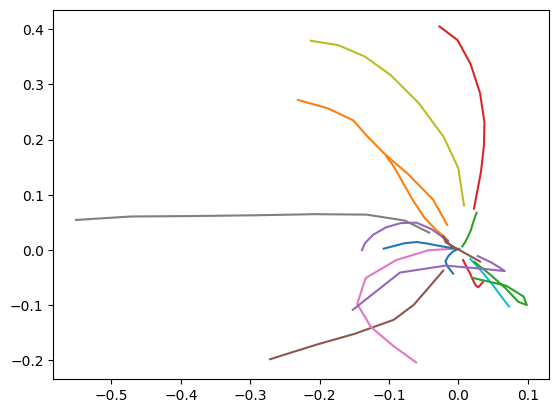

In [6]:
for i in range(16):
    j = argon.random.randint(argon.random.key(i), (), 0, argon.tree.axis_size(actions))
    plt.plot(rel_actions.agent_pos[j, :, 0], rel_actions.agent_pos[j, :, 1])

(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)
(20078, 1, 2) (20078, 8, 2)


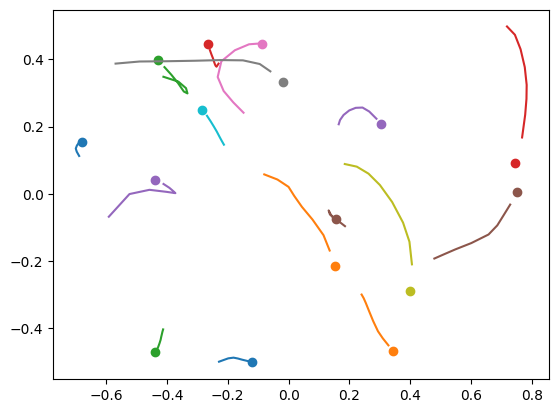

In [9]:
from argon.envs.pusht import PushTPosObs, PushTAgentPos
import argon.random
import argon.tree

for i in range(16):
    j = argon.random.randint(argon.random.key(i), (), 0, argon.tree.axis_size(actions))
    # plt.plot(actions.agent_pos[j, :, 0], actions.agent_pos[j, :, 1])
    print(obs.agent_pos.shape, rel_actions.agent_pos.shape)
    j_actions = rel_actions.agent_pos[j, :] + obs.agent_pos[j,0,:]
    plt.plot(j_actions[:,0], j_actions[:,1])
    plt.scatter(obs.agent_pos[j, :, 0], obs.agent_pos[j, :, 1])